<a href="https://colab.research.google.com/github/siddiqui16/modeling_task/blob/main/2022_07_18_Axa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Final Observations
 1. The data contains missing values in columns vehicle_value, vehicle_power, and ph_owns_home. In hold_out also we have the missing values in the above mentioned columns. (see 3.1)
 2. For filling of missing values we have used linear regression for vehicle_value and vehicle_power, and logistic regression for ph_owns_home. (see 3.1.1)
 3. Almost all the columns and their crosses have moderate to weak correlation towards the target. (see 3.2)
 4. Based on observation 3, a good starting method can be Ridge regression. Prediction of insurance claims need to be explainable as well. This means that we need models that later be interpreted, e.g., regression, and tree-based models. 
 5. We have tried the following algorithms:

| Model  | Description                           | 
|--------|---------------------------------------| 
| AB-RFR | Adaboost with Radom Forest Regressor  | 
| AB-DTR | Adaboost with Decision Tree Regressor |
| RFR    | Radom Forest Regressor                |
| L2     | Ridge Regressor                       |
| AB-L2  | Adaboost with Regressor               |

We have used Random Forest Regressor for scoring on the hold out dataset.

| Model  | Train    | Validate | Test     | | 
|--------|----------|----------|----------|-| 
| AB-RFR | 105.2    | 303.8    | 319.1    | | 
| AB-DTR | 195.1    | 309.3    | 323.6    | |
| RFR    | 127.5    | 310.3    | 330.4    |+|
| L2     | 348.9    | 332.2    | 344.3    | |
| AB-L2  | 382.9    | 368.0    | 373.9    | |



# 1. Imports

In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

def rand_jitter(arr, discount=2):
    stdev = .01 * (max(arr) - min(arr))
    return arr + np.random.randn(len(arr)) * stdev/discount

# 2. Load data

In [2]:
df = pd.read_csv("data_train.csv")
df_hold_out  = pd.read_csv("data_hold_out.csv")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5228 entries, 0 to 5227
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   target          5228 non-null   float64
 1   vehicle_age     5228 non-null   int64  
 2   vehicle_value   5180 non-null   float64
 3   vehicle_power   5169 non-null   float64
 4   ph_age          5228 non-null   int64  
 5   licence_years   5228 non-null   int64  
 6   licence_points  5228 non-null   int64  
 7   ph_owns_home    5165 non-null   float64
 8   annual_mileage  5228 non-null   int64  
dtypes: float64(4), int64(5)
memory usage: 367.7 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1772 entries, 0 to 1771
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              1772 non-null   int64  
 1   vehicle_age     1772 non-null   int64  
 2   vehicle_value   1756 non-null   float64
 3   vehicle_pow

target  vehicle_age  vehicle_value  vehicle_power  ph_age  \
0  2279.692531            1         8293.0           68.0      42   
1  2000.064298            6         7087.0           51.0      45   
2  2012.707571            0         9045.0           60.0      61   
3  2763.597247            3        10805.0           98.0      48   
4  2096.998879            4        12447.0           82.0      62   

   licence_years  licence_points  ph_owns_home  annual_mileage  
0             10               0           1.0           12000  
1             15               3           0.0            8000  
2             24               0           0.0            1000  
3             17               3           0.0           10000  
4             20               0           1.0           11000

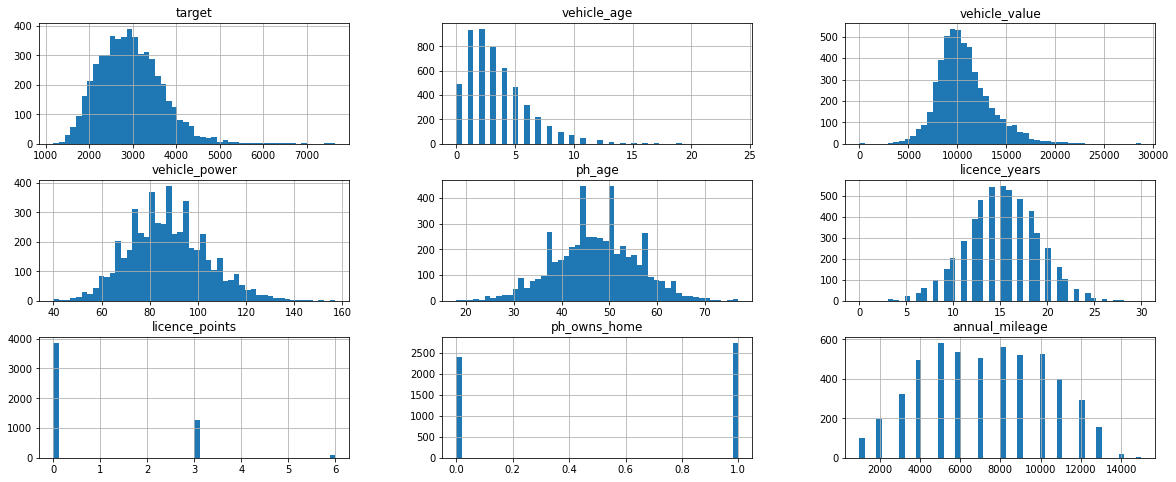

In [3]:
df.info()
res = df.hist(figsize=(20,8), bins=50)
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1772 entries, 0 to 1771
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              1772 non-null   int64  
 1   vehicle_age     1772 non-null   int64  
 2   vehicle_value   1756 non-null   float64
 3   vehicle_power   1754 non-null   float64
 4   ph_age          1772 non-null   int64  
 5   licence_years   1772 non-null   int64  
 6   licence_points  1772 non-null   int64  
 7   ph_owns_home    1749 non-null   float64
 8   annual_mileage  1772 non-null   int64  
dtypes: float64(3), int64(6)
memory usage: 124.7 KB


id  vehicle_age  vehicle_value  vehicle_power  ph_age  licence_years  \
0   1            8         7899.0           89.0      48             19   
1   2            3        14950.0          116.0      43             15   
2   3            2         8894.0           69.0      63             20   
3   4            0        13352.0           76.0      53             16   
4   5            2        10063.0           81.0      43             14   

   licence_points  ph_owns_home  annual_mileage  
0               3           0.0            2000  
1               0           0.0            7000  
2               3           1.0            6000  
3               0           1.0           12000  
4               3           0.0           10000

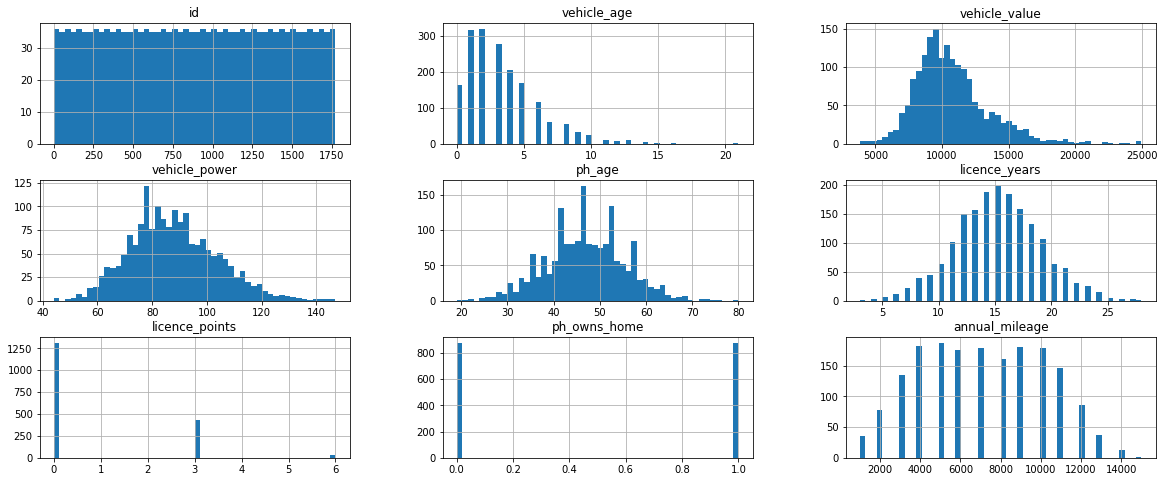

In [39]:
df_hold_out.info()
res = df_hold_out.hist(figsize=(20,8), bins=50)
df_hold_out.head()

In [4]:
# Convert ph_owns_home boolean
df.ph_owns_home = df.ph_owns_home.astype('Int64')

# 3. Explore & Preprocess 

## 3.1 Missing values
For the following columns we have missing values:
 * vehicle_value 48/5228 missing
 * vehicle_power 59/5228 missing
 * ph_owns_home  63/5228 missing

A method for missing value replinshment is important as we can expecting data with missing values (as is the case in hold out dataset). 

There are variuos methods to fill in the missing values:
 * replace with 0
 * replace with mean
 * **learn a regressor/classifier** over other attributes to determine the missing value.

In the following, we analyse the columns with missing values with other columns. 


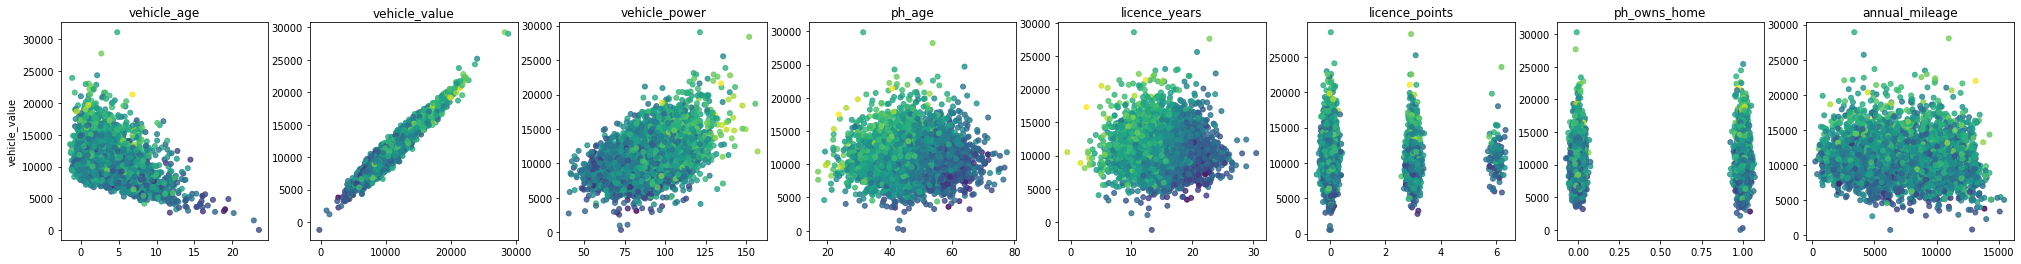

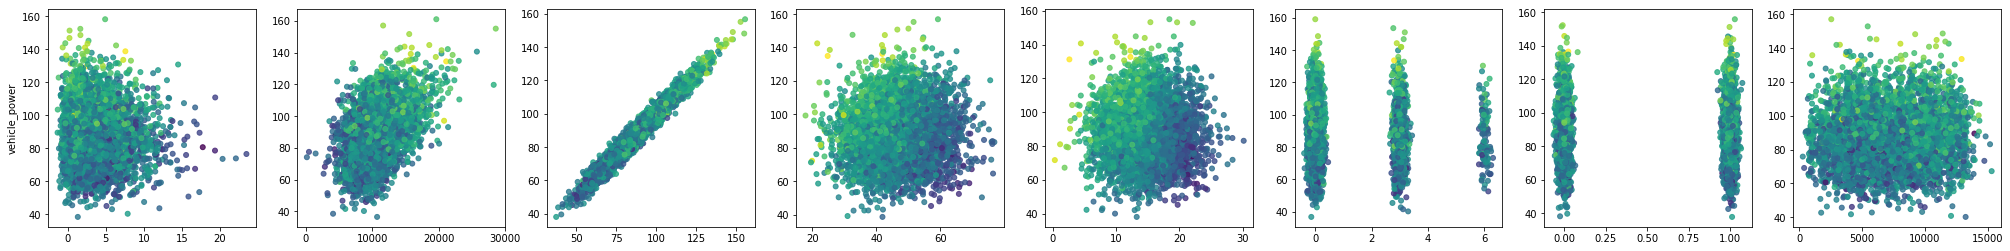

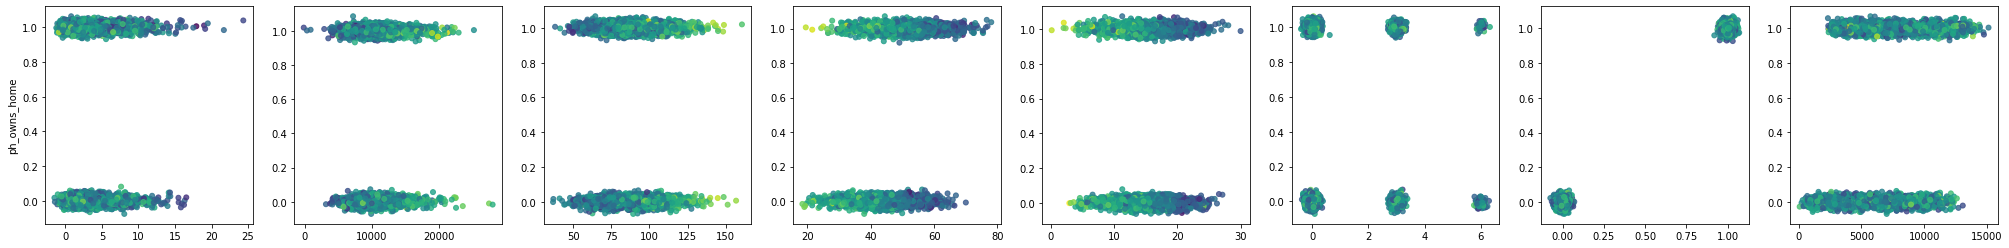

In [35]:
cols = df.columns[1:]
label = df.columns[0]

cols_missing_values = ["vehicle_value", "vehicle_power", "ph_owns_home"]
df_nm = df.dropna()

nrows = len(cols_missing_values)
ncols = len(cols)
for mi, m in enumerate(cols_missing_values[:]):
    plt.subplots(figsize=(35, 4))
    for ci, c in enumerate(cols):
        plt.subplot(1, ncols, ci+1)
        plt.scatter(x=rand_jitter(df_nm[c],0.5), y=rand_jitter(df_nm[m],0.5), alpha=0.8, c=np.log(df_nm.target), s=25)
        if mi == 0:
            plt.title(f'{c}')
        if ci == 0:
            plt.ylabel(f'{m}')
    plt.show()

### 3.1.1 Learn regressor/classifiers to predict the missing values

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import collections

#df_nm = df.dropna()
df_nm.info()
df_nm_train, df_nm_test =  train_test_split(df_nm, train_size=0.66)

def learn_models_for_missing_values(df_train, cols_missing_values):
    models = {}
    for m in cols_missing_values:
        cols_ = list(cols.copy())
        cols_.remove(m)

        if m == "vehicle_value":
            cols_ = ["vehicle_age"]
        if m == "vehicle_power":
            cols_ = ["vehicle_age", "vehicle_value"]
        elif m == "ph_owns_home":
            pass

        models[f"{m}_cols"] = cols_

        X_train, Y_train = df_train[cols_], df_train[m]

        model_scaler = StandardScaler()
        model_scaler.fit(X_train)
        models[f"{m}_scaler"] = model_scaler
        X_train_norm = model_scaler.transform(X_train)

        if m == "vehicle_value":
            model_mv = Ridge()
        if m == "vehicle_power":
            model_mv = Ridge()
        elif m == "ph_owns_home":
            model_mv = LogisticRegression()
            Y_train = Y_train.astype('str')
        print(collections.Counter(Y_train))
        model_mv.fit(X_train_norm, Y_train)
        models[f"{m}_mv"] = model_mv
    return models
models = learn_models_for_missing_values(df_nm_train, cols_missing_values)
print(models)

def fill_missing_values(df_w_missing, cols_missing_values, models):
    df_w_missing = df_w_missing.copy()
    for m in cols_missing_values:
        df_m = df_w_missing[df_w_missing[m].isna()]
        if len(df_m) == 0:
            continue
        cols_ = list(cols.copy())
        cols_.remove(m)
        print(m, cols_)

        cols_ = models[f"{m}_cols"]
        X_score = df_m[cols_]
        model_scaler = models[f"{m}_scaler"]
        X_score_norm = model_scaler.transform(X_score)
        model_mv = models[f"{m}_mv"]
        Y_score = model_mv.predict(X_score_norm)
        if m == "ph_owns_home":
            Y_score = [int(v) for v in Y_score]
        df_w_missing.loc[df_w_missing[m].isna(),m] = Y_score
        print(Y_score)
        df_m.head(50)
    return df_w_missing

df_filled_missing = fill_missing_values(df, cols_missing_values, models)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5063 entries, 0 to 5227
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   target          5063 non-null   float64
 1   vehicle_age     5063 non-null   int64  
 2   vehicle_value   5063 non-null   float64
 3   vehicle_power   5063 non-null   float64
 4   ph_age          5063 non-null   int64  
 5   licence_years   5063 non-null   int64  
 6   licence_points  5063 non-null   int64  
 7   ph_owns_home    5063 non-null   Int64  
 8   annual_mileage  5063 non-null   int64  
dtypes: Int64(1), float64(3), int64(5)
memory usage: 400.5 KB
Counter({9925.0: 4, 9699.0: 4, 9065.0: 4, 8562.0: 4, 10886.0: 4, 10037.0: 4, 10843.0: 4, 10366.0: 4, 10499.0: 4, 11174.0: 4, 7871.0: 4, 8988.0: 3, 8229.0: 3, 10324.0: 3, 11335.0: 3, 10849.0: 3, 9613.0: 3, 8166.0: 3, 10005.0: 3, 11530.0: 3, 9024.0: 3, 10737.0: 3, 12674.0: 3, 11436.0: 3, 10938.0: 3, 11164.0: 3, 8859.0: 3, 11986.0: 3, 959

## 3.2 Explore

### 3.2.1 Separate the data into train/validate after filling missing values

In [7]:
df_train_, df_test = train_test_split(df_filled_missing, train_size=0.75)
df_train, df_validate = train_test_split(df_train_, train_size=0.75)
print(f"#train = {len(df_train)}, #validate = {len(df_validate)}, #test = {len(df_test)}")

#train = 2940, #validate = 981, #test = 1307


### 3.2.2 Correlation between columns and to target

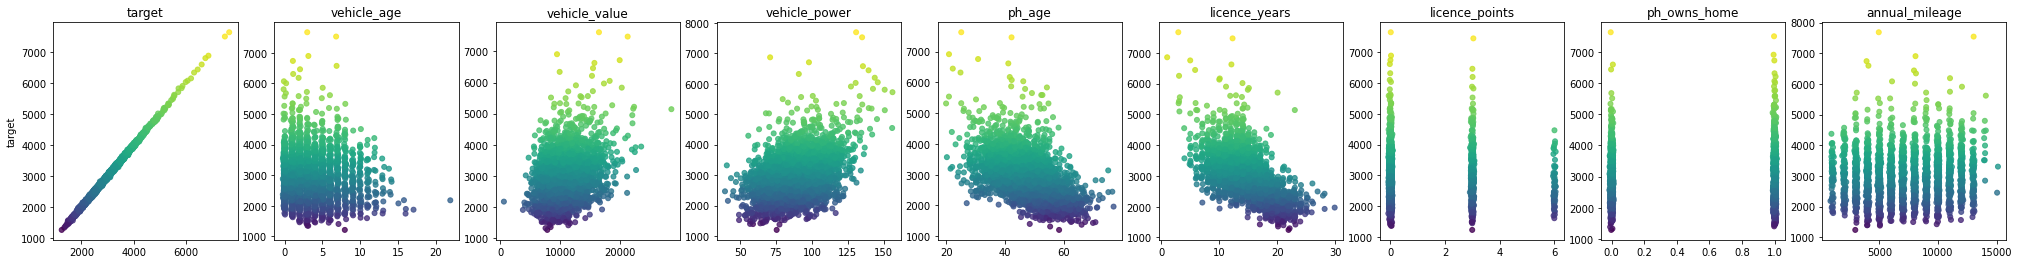

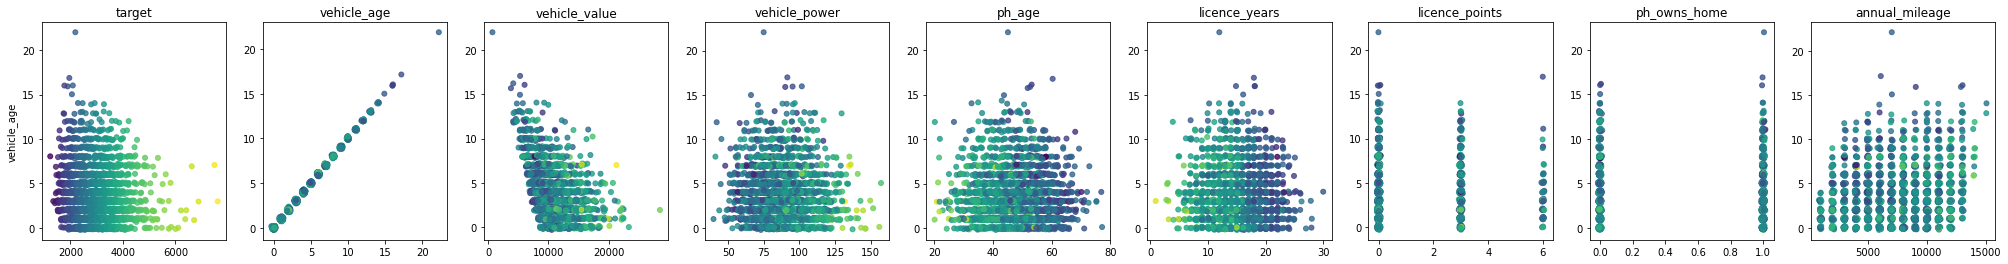

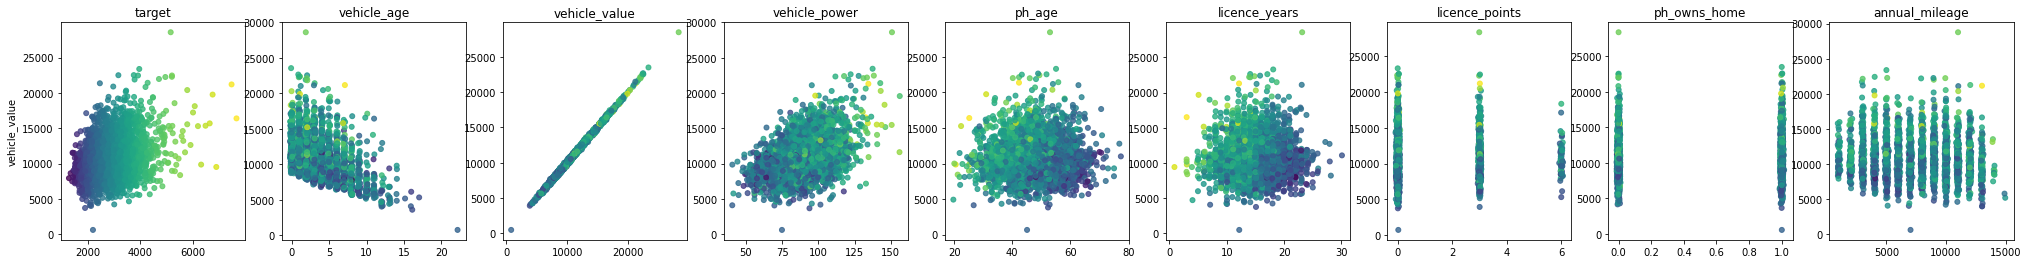

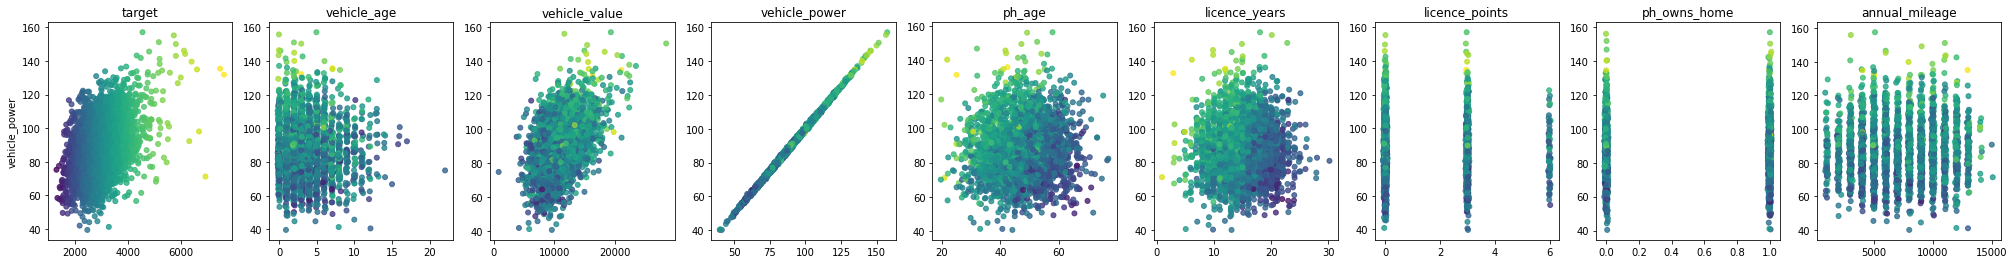

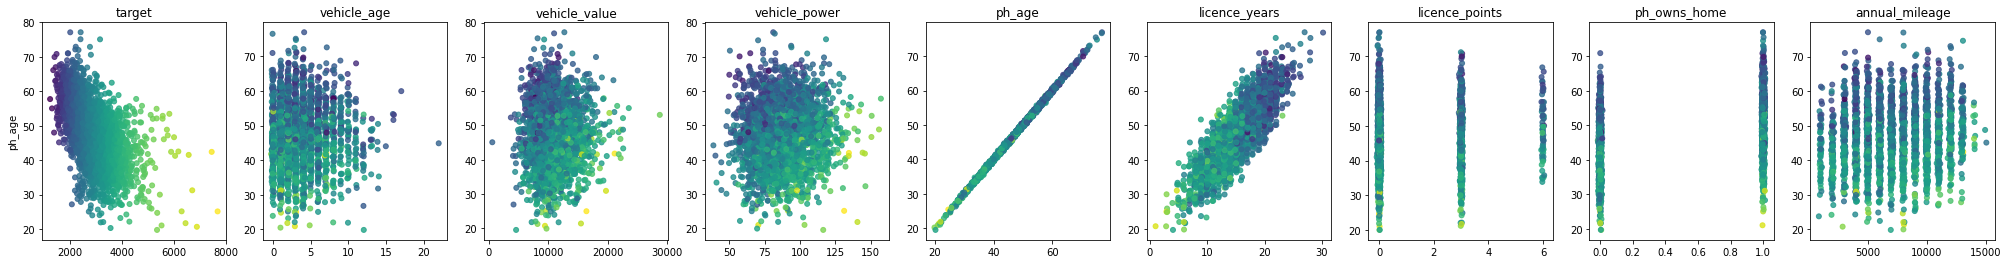

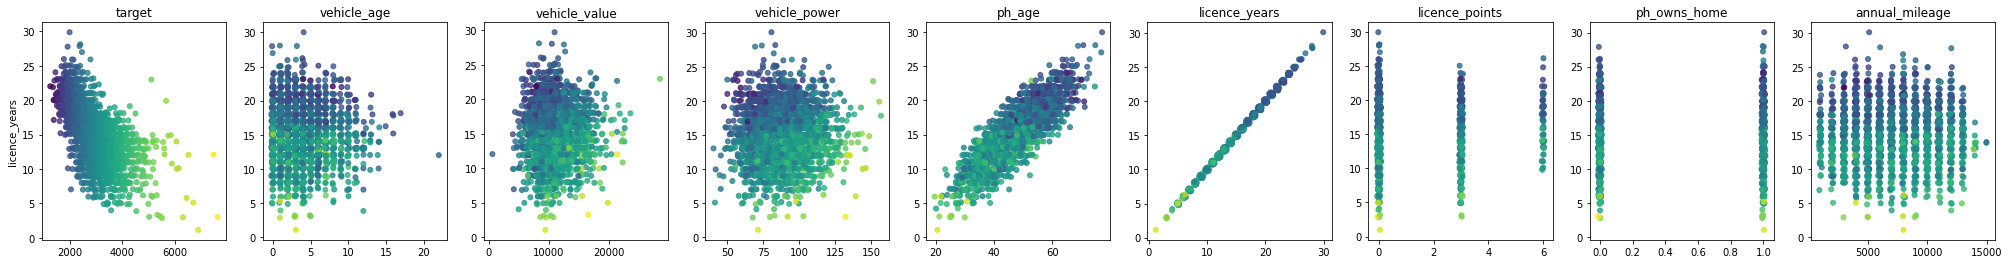

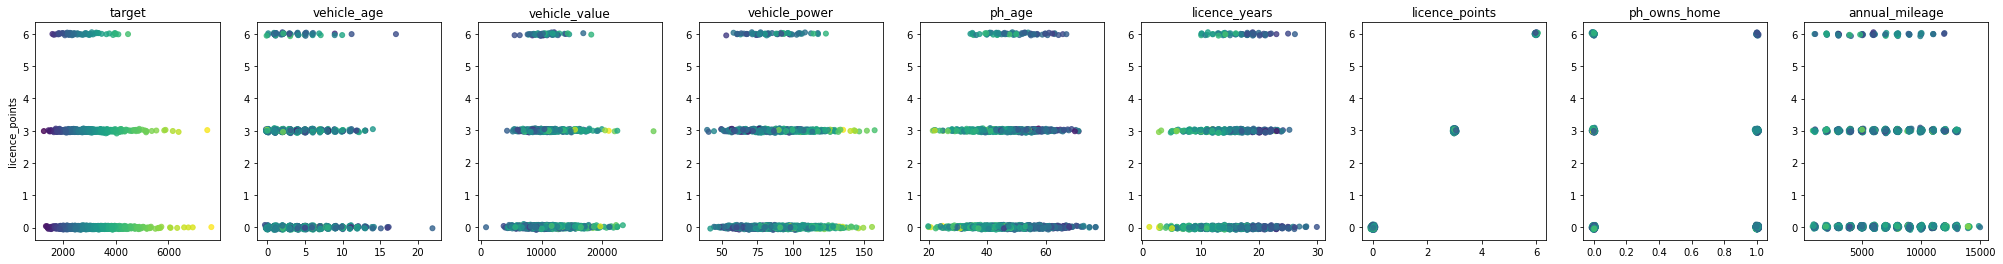

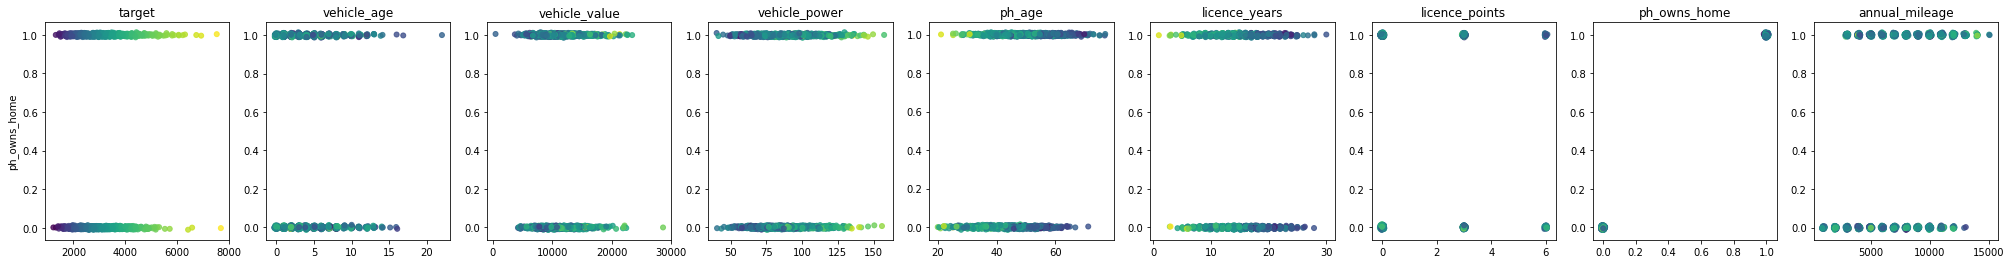

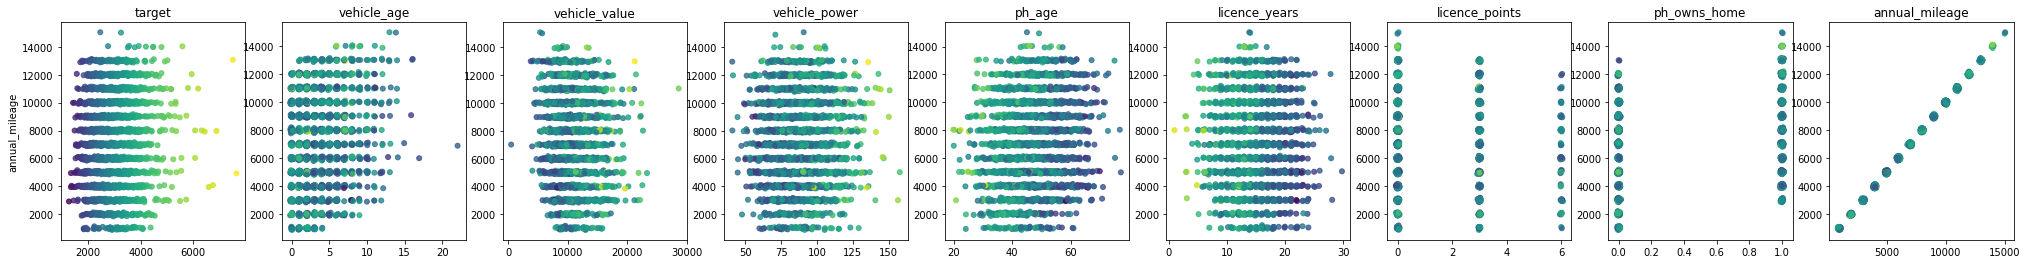

In [38]:
cols_ = list(cols)
cols_ = ["target"] + cols_
ncols = len(cols_)
for mi, m in enumerate(cols_):
    plt.subplots(figsize=(35, 4))
    for ci, c in enumerate(cols_):
        plt.subplot(1, ncols, ci+1)
        plt.scatter(x=rand_jitter(df_train[c],2.5), y=rand_jitter(df_train[m],2.5), alpha=0.8, c=np.log(df_train.target), s=25)
        plt.title(f'{c}')
        if ci == 0:
            plt.ylabel(f'{m}')
    plt.show()
    #break

### 3.2.3 Pearson Correlation between columns targets

target  vehicle_age  vehicle_value  vehicle_power    ph_age  \
target          1.000000     0.003644       0.754937       0.014288  0.015540   
vehicle_age     0.003644     1.000000       0.033243      -0.000448  0.003997   
vehicle_value   0.754937     0.033243       1.000000       0.042639  0.008710   
vehicle_power   0.014288    -0.000448       0.042639       1.000000 -0.003041   
ph_age          0.015540     0.003997       0.008710      -0.003041  1.000000   
licence_years   0.005974     0.000542       0.000415      -0.007748  0.237730   
licence_points -0.008253     0.006784       0.001237       0.018940 -0.019370   
ph_owns_home    0.008803     0.001954       0.011736       0.003352 -0.000791   
annual_mileage -0.005240     0.019414      -0.000363       0.005006 -0.007387   

                licence_years  licence_points  ph_owns_home  annual_mileage  
target               0.005974       -0.008253      0.008803       -0.005240  
vehicle_age          0.000542        0.006784      0.001954        0.019414  
vehicle_value        0.000415        0.001237      0.011736       -0.000363  
vehicle_power       -0.007748        0.018940      0.003352        0.005006  
ph_age               0.237730       -0.019370     -0.000791       -0.007387  
licence_years        1.000000        0.018647     -0.009300       -0.005390  
licence_points       0.018647        1.000000      0.054593       -0.013576  
ph_owns_home        -0.009300        0.054593      1.000000        0.019538  
annual_mileage      -0.005390       -0.013576      0.019538        1.000000

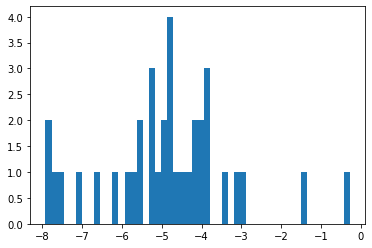

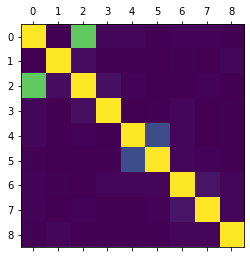

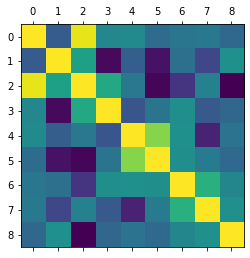

In [9]:
df_corr = df.apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=10)
s = len(df_corr)
corr = []
for i in range(s):
    for j in range(i+1,s):
        corr.append(np.log(abs(df_corr.iloc[i,j])))
plt.hist(corr, bins=50)
plt.matshow((abs(df_corr)))
plt.matshow(np.log(abs(df_corr)))
df_corr

## 3.3 Transformation
Most columns are normally distrbuted. We can use PowerTransform to transform the skewed distribution to normal, and also to apply normalisation.

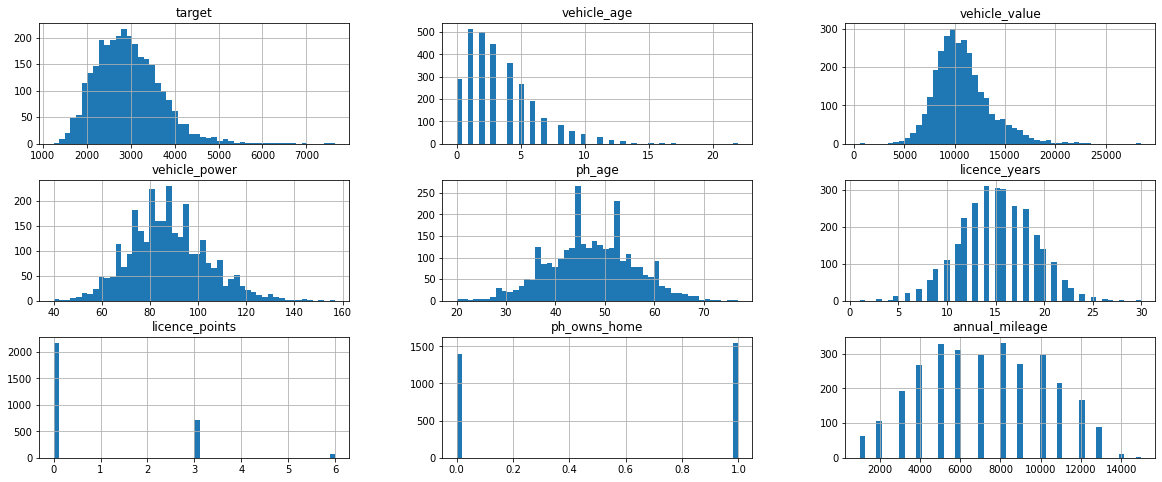

In [41]:
res = df_train.hist(figsize=(20,8), bins=50)

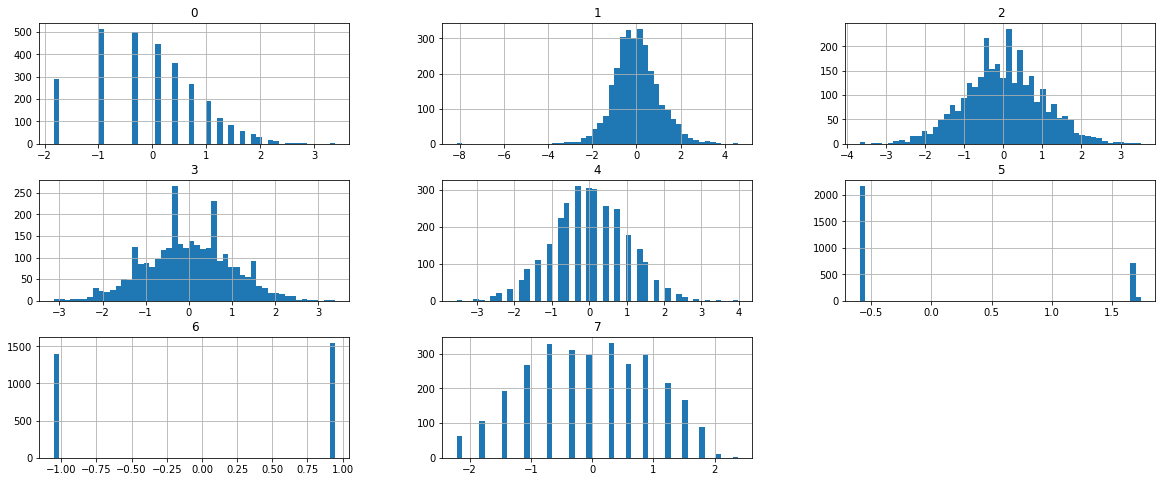

In [48]:
from sklearn.preprocessing import PowerTransformer
bc = PowerTransformer(method="box-cox")
yj = PowerTransformer(method="yeo-johnson")
yj.fit(df_train[cols])

df_train_pt = yj.transform(df_train[cols])
res = pd.DataFrame(df_train_pt).hist(figsize=(20,8), bins=50)

## 3.4 Finalise the datasets for modelling

In [49]:
X_train = yj.transform(df_train[cols])
X_validate = yj.transform(df_validate[cols])
X_test = yj.transform(df_test[cols])

y_train = df_train["target"]
y_validate = df_validate["target"]
y_test = df_test["target"]

# 4. Modelling

In [106]:
from sklearn.metrics import mean_absolute_error, median_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor

In [136]:
# helper function for model training
# if we want to do x-validation late, we only have to modify this function

def train_model(model, name=None, X_train=None, y_train=None, X_test=None, y_test=None, f_train=True, plot=True):
    if plot:
        plt.subplots(figsize=(8, 4))
    if not name:
        name = str(model)[:10]
    m_train = 0.0
    if f_train:
        model.fit(X_train, y_train)
        y_train_hat = model.predict(X_train)
        m_train = mean_absolute_error(y_train, y_train_hat)
        if plot:
            plt.subplot(1, 2, 1)
            plt.scatter(x=y_train, y=y_train_hat, c = abs(y_train - y_train_hat), alpha=0.25, s=15)
            plt.title("%0.2f" % m_train)
    y_test_hat = model.predict(X_test)
    m_test  = mean_absolute_error(y_test, y_test_hat)
    print("%0.4f - %0.4f" % (m_train, m_test), name)
    if plot:
        plt.subplot(1, 2, 2)
        plt.scatter(x=y_test, y=y_test_hat, c= abs(y_test-y_test_hat), alpha=0.25, s=15)
        plt.title("%0.2f" % m_test)
        plt.show()
    return m_train, m_test, model

algos = {
    #"R": LinearRegression(),
    #"L1": LinearRegression(),
    "L2": Ridge(),
    #"DTR": DecisionTreeRegressor(max_depth=12, min_samples_leaf=5),
    "RFR": RandomForestRegressor(n_estimators=20),
    "AB-DTR": AdaBoostRegressor(DecisionTreeRegressor(max_depth=12, min_samples_leaf=5)),
    "AB-RFR": AdaBoostRegressor(n_estimators=20, base_estimator=RandomForestRegressor(n_estimators=20)),
    "AB-L2": AdaBoostRegressor(n_estimators=200, base_estimator=Ridge())

}

learned_models = {
    
}
for name in algos:
    m_train, m_test, model = train_model(algos[name], name=name, X_train=df_train[cols], y_train=y_train, X_test=df_validate[cols], y_test=y_validate, plot=True)
    #m_train, m_test, model = train_model(algos[name], name=name, X_train=X_train, y_train=y_train, X_test=X_validate, y_test=y_validate)
    learned_models[name] = model

348.9636 - 332.2747 L2
127.5412 - 310.3629 RFR
195.1219 - 309.3859 AB-DTR
105.2763 - 303.8398 AB-RFR
382.9148 - 368.0676 AB-L2


In [127]:
for name in learned_models:
    train_model(learned_models[name], name=name, X_test=df_test[cols], y_test=y_test, f_train=False, plot=False)
    #train_model(learned_models[name], name=name, X_test=X_test, y_test=y_test, f_train=False)

0.0000 - 344.3625 L2
0.0000 - 330.4597 RFR
0.0000 - 323.6613 AB-DTR
0.0000 - 319.1875 AB-RFR
0.0000 - 373.9336 AB-L2


# 5. Score Hold-out

In [137]:
df_hold_out_filled_missing = fill_missing_values(df_hold_out, cols_missing_values, models)
X_hold_out = yj.transform(df_hold_out_filled_missing[cols])
Y_hold_out = learned_models["RFR"].predict(df_hold_out_filled_missing[cols])
df_hold_out_filled_missing["target"] = Y_hold_out

vehicle_value ['vehicle_age', 'vehicle_power', 'ph_age', 'licence_years', 'licence_points', 'ph_owns_home', 'annual_mileage']
[10003.23159763 11694.95993342 10003.23159763  9580.29951368
 11694.95993342 10426.16368157  9580.29951368 11694.95993342
 10849.09576552  9580.29951368  9580.29951368 10003.23159763
 10849.09576552 10849.09576552 10003.23159763 11272.02784947]
vehicle_power ['vehicle_age', 'vehicle_value', 'ph_age', 'licence_years', 'licence_points', 'ph_owns_home', 'annual_mileage']
[ 87.17717391  85.28253443 108.52247771  83.94544859  77.8811898
  78.67961886  86.11893857 111.2377475   81.2871981   87.50031357
  92.05326022  98.66564689  85.22862681  78.84118302  85.2697816
  86.5181531   89.24616439  83.1153245 ]
ph_owns_home ['vehicle_age', 'vehicle_value', 'vehicle_power', 'ph_age', 'licence_years', 'licence_points', 'annual_mileage']
[0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0]


## 5.1 Write to CSV

In [139]:
df_hold_out_filled_missing[["id", "target"]].to_csv("score_hold_out.csv", index=False)

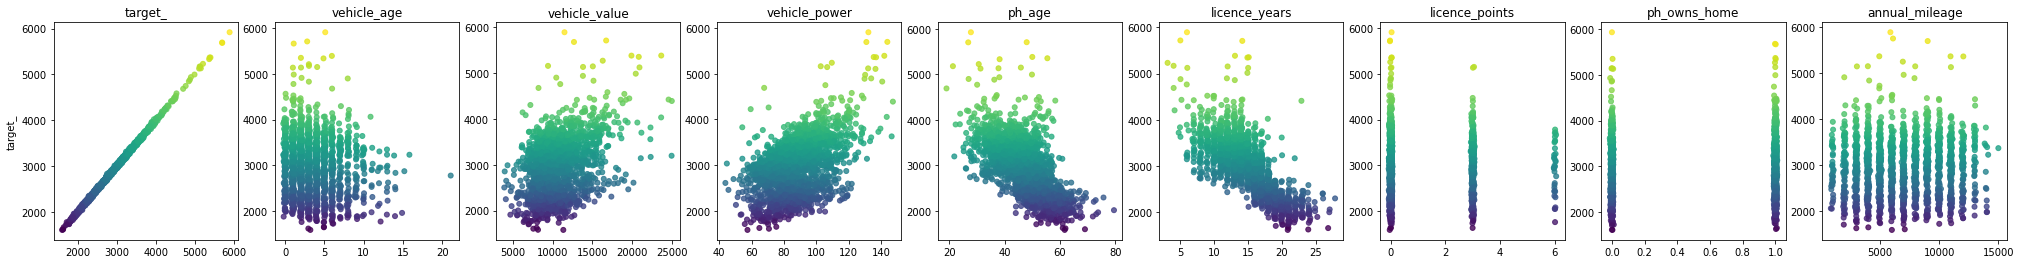

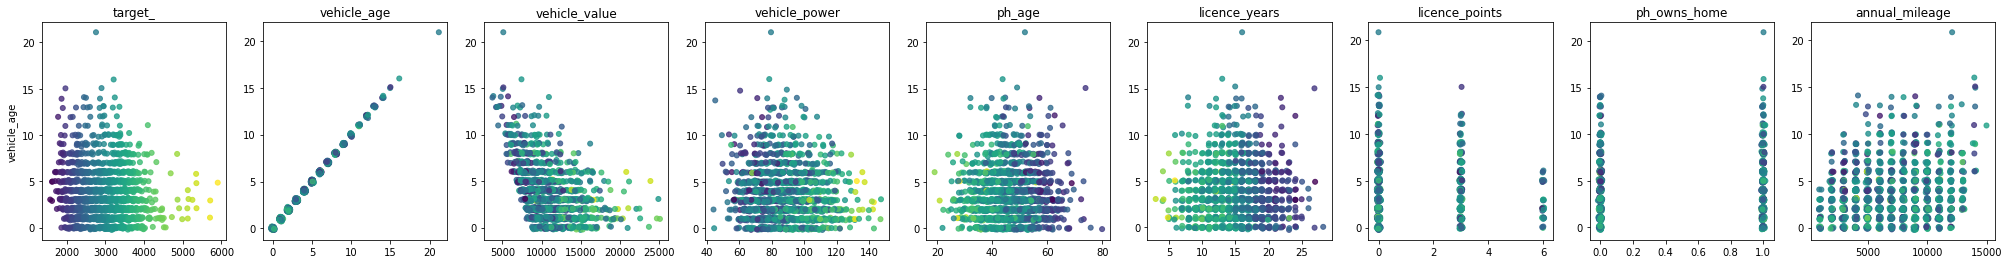

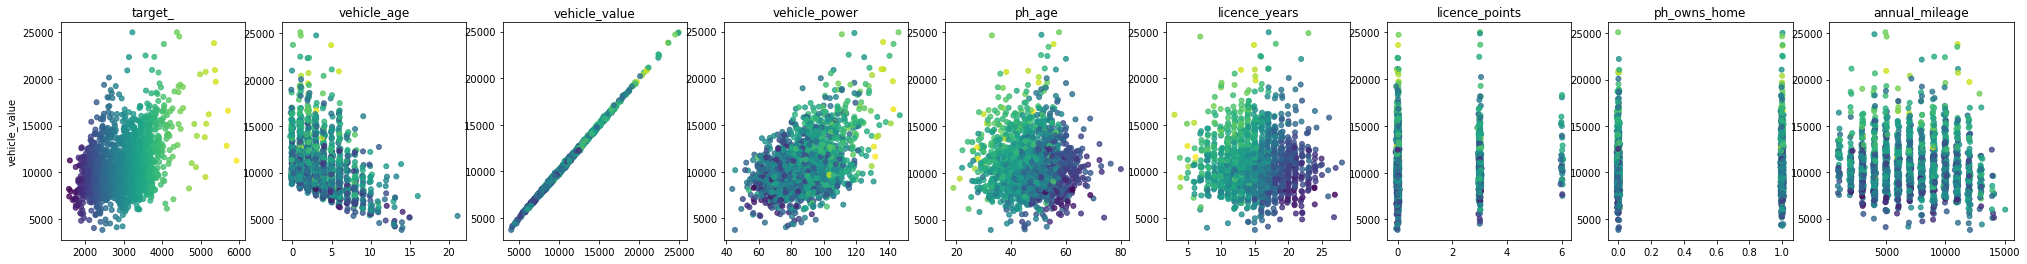

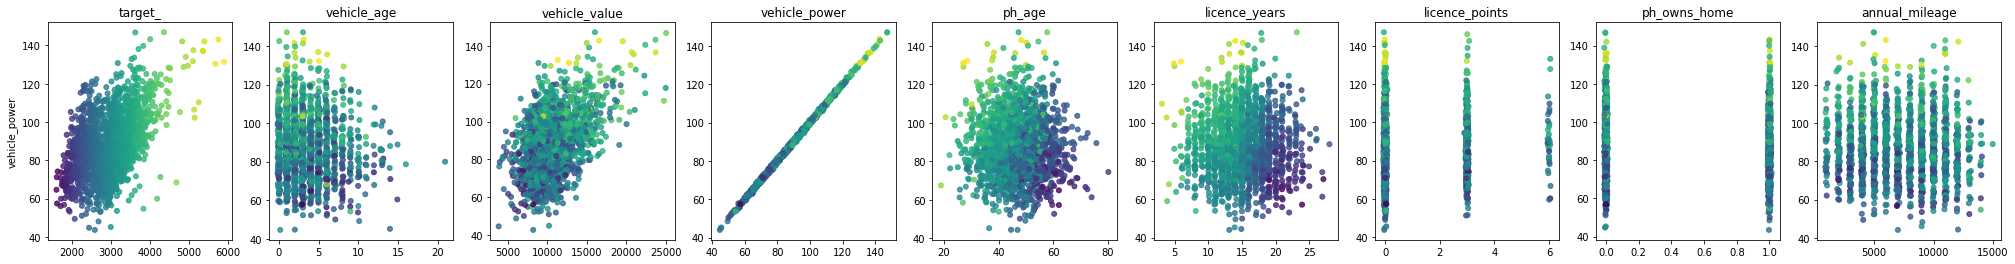

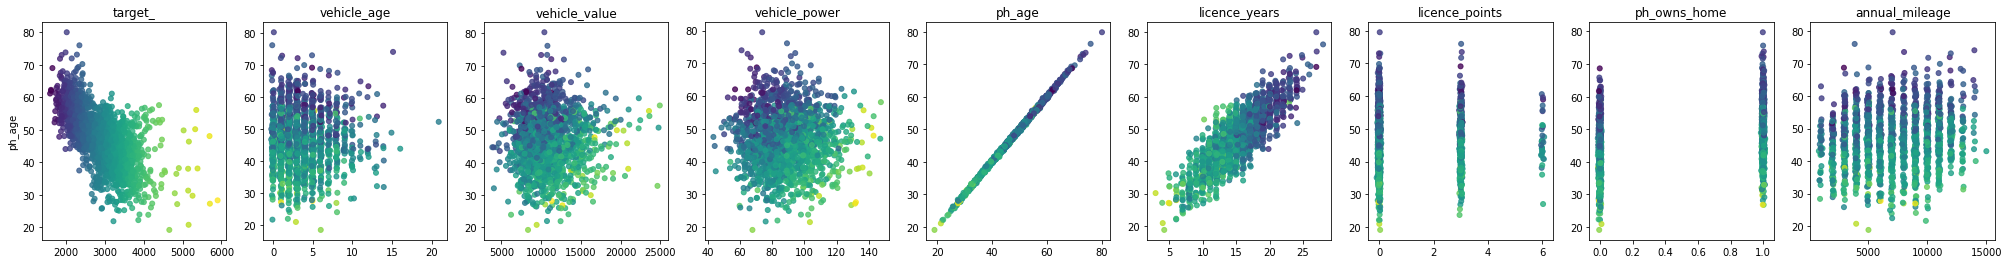

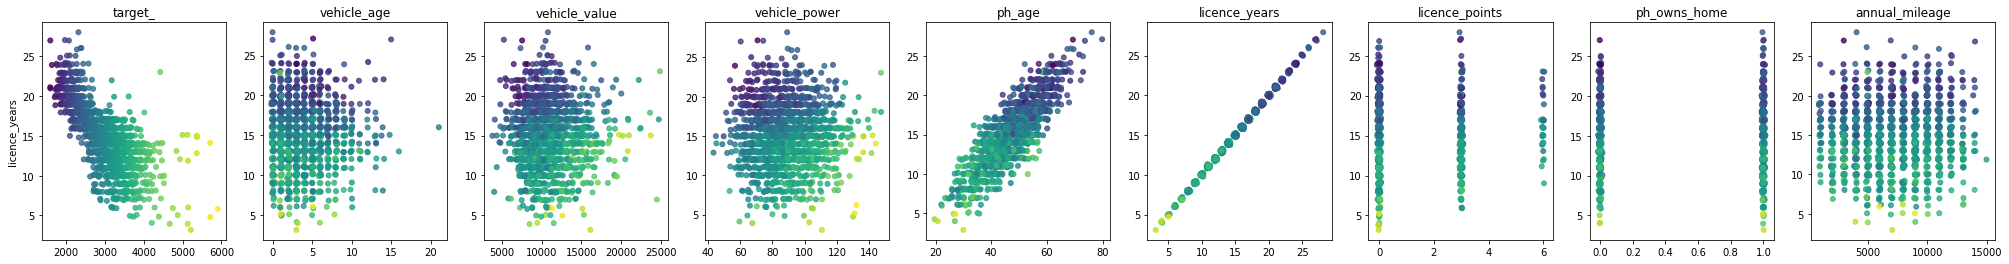

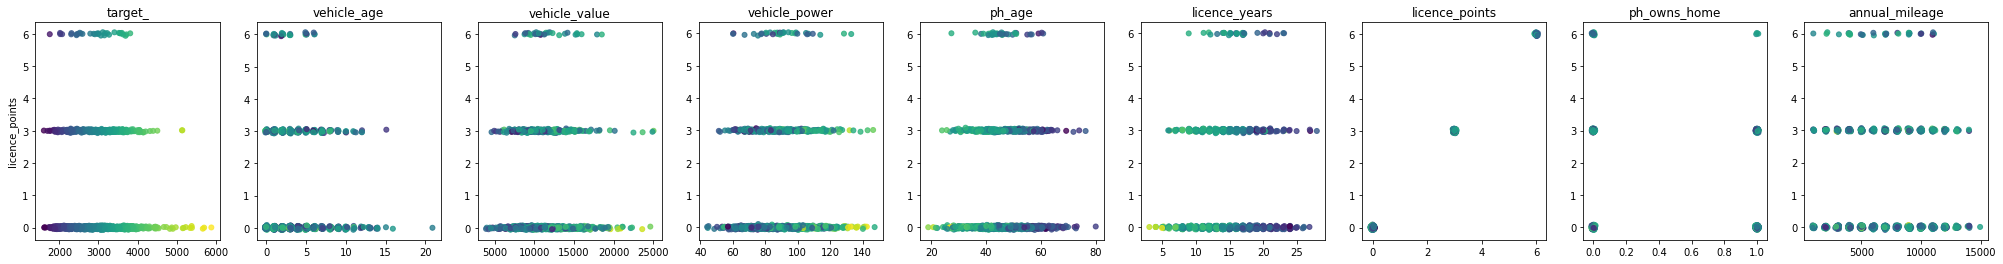

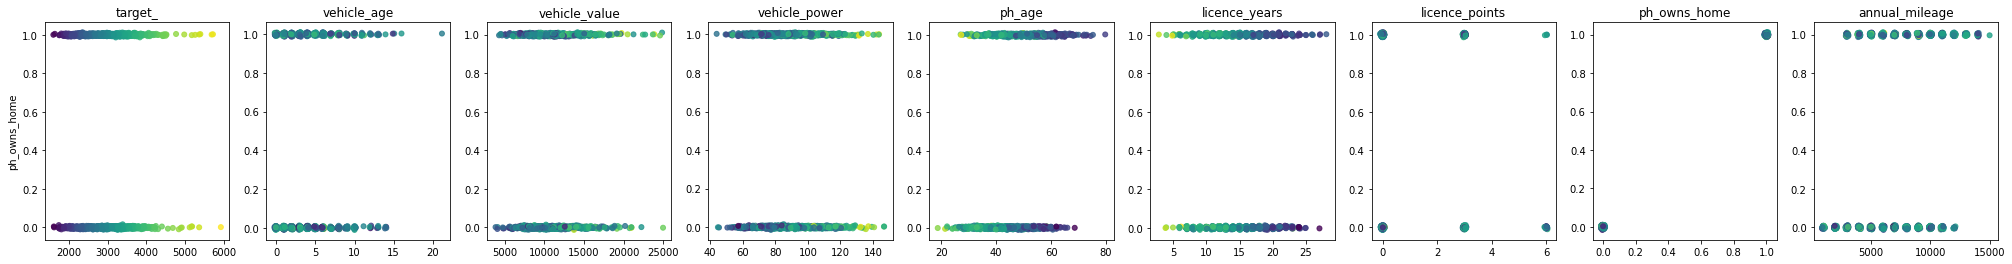

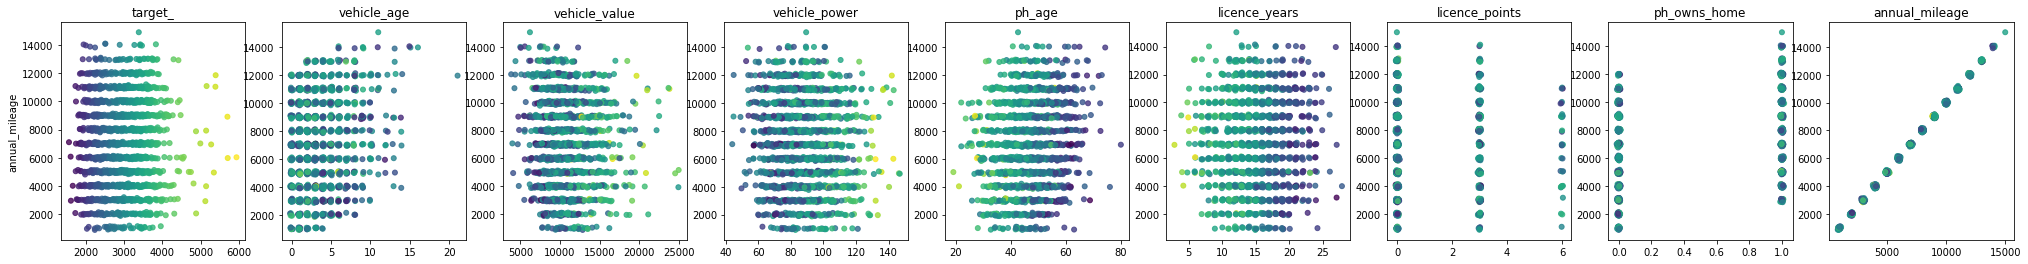

In [135]:
cols_ = list(cols)
cols_ = ["target_"] + cols_
ncols = len(cols_)
for mi, m in enumerate(cols_):
    plt.subplots(figsize=(35, 4))
    for ci, c in enumerate(cols_):
        plt.subplot(1, ncols, ci+1)
        plt.scatter(x=rand_jitter(df_hold_out_filled_missing[c],2.5), y=rand_jitter(df_hold_out_filled_missing[m],2.5), alpha=0.8, c=np.log(df_hold_out_filled_missing.target_), s=25)
        plt.title(f'{c}')
        if ci == 0:
            plt.ylabel(f'{m}')
    plt.show()
    #break